In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

color_palette = cm.Set3

# Exploratory data analysis

In [5]:
x = np.load("../res/x_train.npy")
y = np.load("../res/y_train.npy")

print(x.shape)
print(y.shape)

(2429, 36, 6)
(2429,)


In [41]:
n_samples = x.shape[0]
n_ticks = x.shape[1]
n_dim = x.shape[2]

The given training-validation dataset contains 2429 samples represented by 6 variables over a timeframe of length 36. 
What this data actually represents is not specified. All we know is each sample is associated to a single class that we will aim to correctly predict. We are in a Many-To-One case of sequence classification.  
The labels supposedly associated with each class are as follows:

- 0: *Wish*
- 1: *Another*
- 2: *Comfortably*
- 3: *Money*
- 4: *Breathe*
- 5: *Time*
- 6: *Brain*
- 7: *Echoes*
- 8: *Wearing*
- 9: *Sorrow*
- 10: *Hey*
- 11: *Shine*

As student `carlo_manenti` noticed, these labels correspond to the first words of Pink Floyd's top played titles. This could imply that the data represents audio in some shape, but it's safer to assume that it only tells us about E. Lomurno music tastes.

## Class distribution
The first AN2DL challenge (flower species classification) involved imbalanced training classes. We will take a look at the class distribution in the dataset this time, see if we will have to use some of the strategies we used in the previous challenge for that matter.

In [40]:
class_counts = np.unique(y, return_counts=True)
n_label = len(class_counts[0])

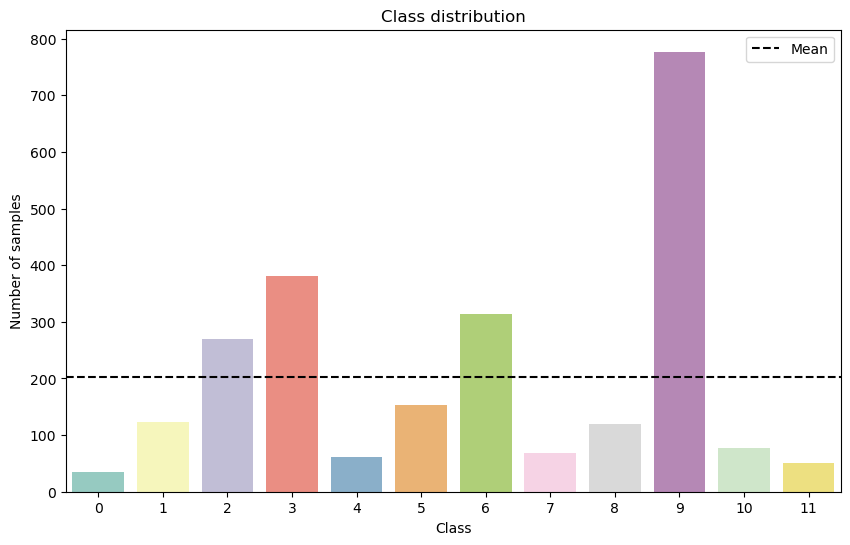

In [70]:
_, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=class_counts[0], y=class_counts[1], ax=ax, palette="Set3")
ax.axhline(np.mean(class_counts[1]), linestyle="--", color="black", label="Mean")
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.legend()
plt.show()

*Oops, they did it again !*

In [37]:
max_n_class, min_n_class = np.max(class_counts[1]), np.min(class_counts[1])
worst_ratio = max_n_class / min_n_class

print("Max/min number of samples in a class: %d and %d respectively, resulting in a maximum imbalance of factor %f" % (
    max_n_class, min_n_class, worst_ratio
))

Max/min number of samples in a class: 777 and 34 respectively, resulting in a maximum imbalance of factor 22.852941


There is a great class imbalance in the dataset, up to a factor of nearly 23 times between the smallest and the biggest class. Even the second biggest class is only half the size of the biggest.

## Univariate distribution of each variable for each class (across entire timeframe)

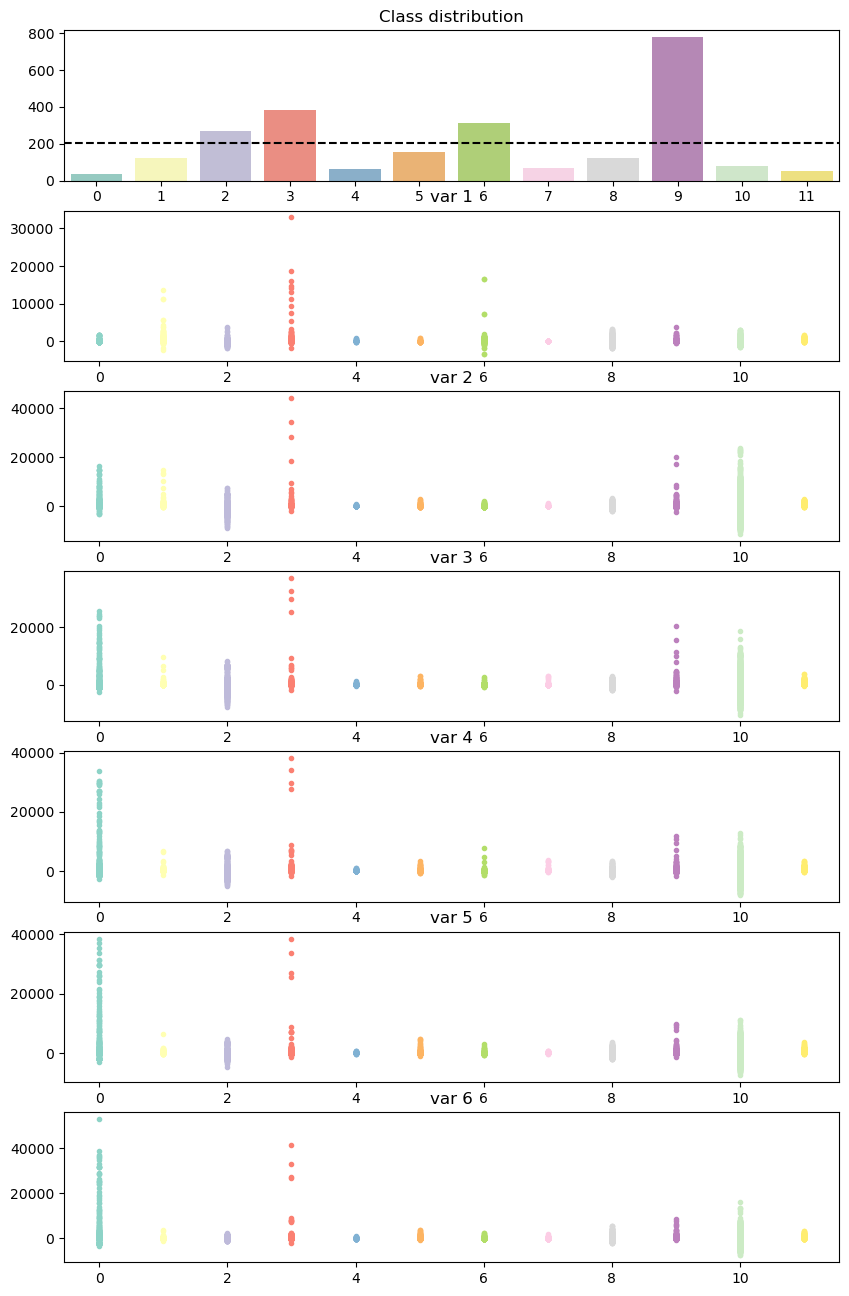

In [102]:
fig, axs = plt.subplots(n_dim+1, 1, figsize=(10, 16))
axs = axs.flatten()

sns.barplot(x=class_counts[0], y=class_counts[1], ax=axs[0], palette="Set3")
axs[0].axhline(np.mean(class_counts[1]), linestyle="--", color="black")
axs[0].set_title("Class distribution")

for variable in range(n_dim):
    for label in range(n_label):
        label_mask = y == label
        axs[variable+1].plot(
            np.full(class_counts[1][label] * n_ticks, label), x[label_mask, :, variable].flatten(),
            color=color_palette(label), marker='.', linestyle=''
        )
        axs[variable+1].set_title("var %d" % (variable + 1))

## Average value for each variable for each class at each tick

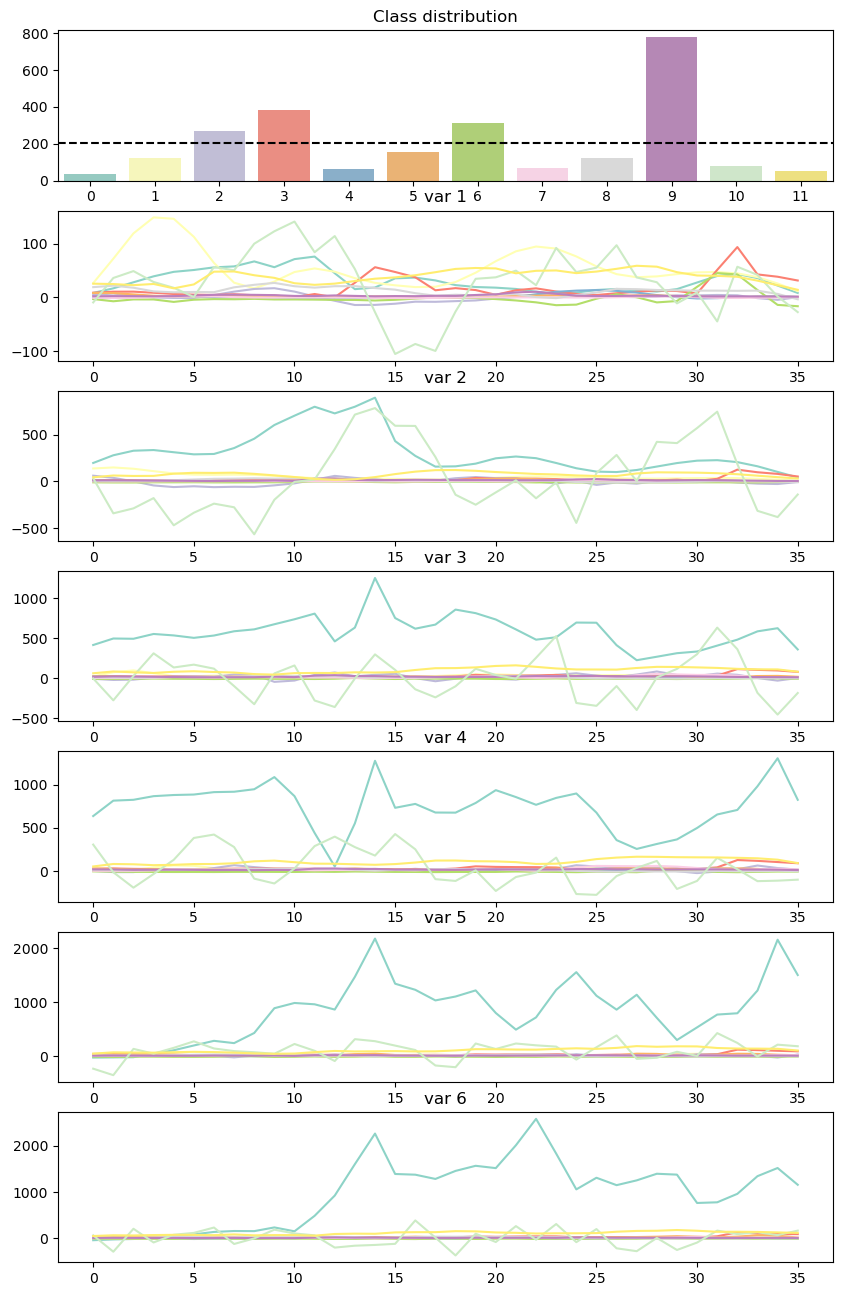

In [82]:
fig, axs = plt.subplots(n_dim+1, 1, figsize=(10, 16))
axs = axs.flatten()

sns.barplot(x=class_counts[0], y=class_counts[1], ax=axs[0], palette="Set3")
axs[0].axhline(np.mean(class_counts[1]), linestyle="--", color="black")
axs[0].set_title("Class distribution")

for variable in range(n_dim):
    for label in range(n_label):
        label_mask = y == label
        axs[variable+1].plot(np.arange(n_ticks), np.mean(x[label_mask, :, variable], axis=0), color=color_palette(label))
        axs[variable+1].set_title("var %d" % (variable + 1))

plt.show()

## Timeseries analysis: seasonality ? univariate autocorrelation ? correlation between variables, at different lags ?